In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import re
%matplotlib inline

In [2]:
cwd = os.path.abspath(os.curdir)

In [3]:
def RunSysCmd(cmd):
    import subprocess
    p = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    p_status = p.wait()
    print(output.decode('utf-8'))

In [4]:
RunSysCmd('scons')

scons: Reading SConscript files ...
scons: done reading SConscript files.
scons: Building targets ...
CXX arm_nnexamples_cifar10.cpp
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ActivationFunctions\arm_nn_activations_q15.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ActivationFunctions\arm_nn_activations_q7.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ActivationFunctions\arm_relu_q15.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ActivationFunctions\arm_relu_q7.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ConvolutionFunctions\arm_convolve_1x1_HWC_q7_fast_nonsquare.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ConvolutionFunctions\arm_convolve_HWC_q15_basic.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ConvolutionFunctions\arm_convolve_HWC_q15_fast.c
CC D:\repository\asenv\as\release\download\CMSIS_5\CMSIS\NN\Source\ConvolutionF

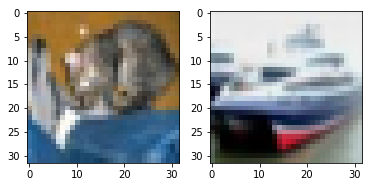

In [5]:
defaults = []
reImg = re.compile('#define IMG_DATA \{([\w\d,]+)\}')
with open('arm_nnexamples_cifar10_inputs.h') as f:
    for l in f.readlines():
        if(reImg.search(l)):
            data = eval('['+reImg.search(l).groups()[0]+']')
            data = np.asarray(data).reshape(32,32,3)/255
            defaults.append(data)
fig, axs = plt.subplots(1, len(defaults))
for i,dft in enumerate(defaults):
    axs[i].imshow(dft)

In [6]:
for i,dft in enumerate(defaults):
    data = dft*255
    data = data.astype(np.int8)
    data.tofile('img.bin')
    RunSysCmd('cifar10 img.bin')

start execution
airplane: 0.7%
automobile: 0.0%
bird: 0.0%
cat: 98.4%
deer: 0.0%
dog: 0.0%
frog: 0.0%
horse: 0.0%
ship: 0.0%
truck: 0.0%

start execution
airplane: 0.0%
automobile: 0.0%
bird: 0.0%
cat: 0.0%
deer: 0.0%
dog: 0.0%
frog: 0.0%
horse: 0.0%
ship: 99.2%
truck: 0.0%



In [7]:
# CATs
#url = 'http://p5.so.qhimgs1.com/bdr/_240_/t011b628e47ccf9983b.jpg'
#url = 'http://p3.so.qhmsg.com/bdr/_240_/t01067394101dcd6278.jpg'
#url = 'http://p5.so.qhimgs1.com/bdr/_240_/t01425873ec4207251b.jpg'

# AIRPLANEs
#url = 'http://p0.so.qhimgs1.com/bdr/_240_/t01a45e71a8867f2354.jpg'
#url = 'http://p4.so.qhmsg.com/bdr/_240_/t01cbd2106353872279.jpg'

# DOGs
#url = 'http://p0.so.qhimgs1.com/bdr/_240_/t0180d8b6dbb9eb54b0.jpg'
#url = 'http://p5.so.qhimgs1.com/bdr/_240_/t015ac334b42ef829db.jpg'
url = 'http://p3.so.qhimgs1.com/bdr/_240_/t017f279f05b2c73b93.jpg'
img = os.path.basename(url)
RunSysCmd('rm -frv %s*'%(img))
RunSysCmd('wget %s'%(url))

removed 't017f279f05b2c73b93.jpg'




start execution
airplane: 0.0%
automobile: 0.0%
bird: 0.0%
cat: 0.0%
deer: 0.0%
dog: 99.2%
frog: 0.0%
horse: 0.0%
ship: 0.0%
truck: 0.0%



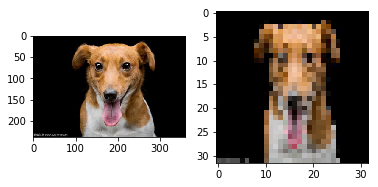

In [8]:
# ref plot: https://www.jianshu.com/p/2b2caa2cf381
im = Image.open(img)
im = im.convert('RGB')
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im)
im = im.resize((32,32))
axs[1].imshow(im)
data = np.asarray(im)
data = data.astype(np.int8)
data.tofile('img.bin')
RunSysCmd('cifar10 img.bin')